<a href="https://colab.research.google.com/github/Sudheer417/Minor_Project/blob/master/Amazon_Fine_Food_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import nltk        # nltk -- Natural Language tool kit--- Library which is used for NLP processing
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/drive/My Drive/python basics/Reviews.csv')
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [3]:
# Deleting Unnecessary Columns
df.drop(['Id' , 'ProductId' , 'UserId' , 'ProfileName' , 'HelpfulnessNumerator' , 'HelpfulnessDenominator' , 'Time' , 'Summary'] , axis = 1 , inplace = True)

In [4]:
df.head()

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...


In [5]:
# Changing the column names..
df.rename(columns= {"Score" : "Ratings" , "Text" : "Reviews"}, inplace = True)
df.head()

,Ratings,Reviews
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...


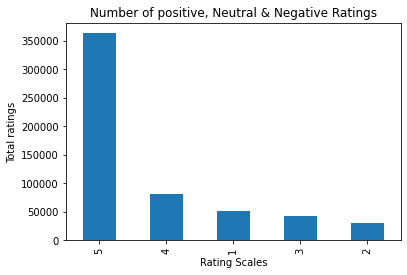

In [6]:
# Bar plot
df.Ratings.value_counts().plot(kind = "bar")
plt.title('Number of positive, Neutral & Negative Ratings')
plt.xlabel('Rating Scales')
plt.ylabel('Total ratings')
plt.show()

**Extracting Sentiments**

In our datset, The values for Ratings column varies on a scale of 1-5, where 1 being the **worst** review and 5 being the Best review. As we predicting Sentiments from the dataset We will ignore all reviews with rating=3, since they tend to have neutral sentiment.

Now, we'll assign reviews with a rating of 4 or higher to be **Positive** reviews, while the ones with rating of 2 or lower are **Negative** and rating of 3 to be **Neutral**. 

In [7]:
# Adding Sentiment column to the dataset based on ratings..
df['Sentiment'] = df['Ratings'].apply(lambda Ratings: "Positive" if Ratings > 3 else( "Negative" if Ratings < 3 else "Neutral"))
df.head()

,Ratings,Reviews,Sentiment
0,5,I have bought several of the Vitality canned d...,Positive
1,1,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,4,This is a confection that has been around a fe...,Positive
3,2,If you are looking for the secret ingredient i...,Negative
4,5,Great taffy at a great price. There was a wid...,Positive


In [8]:
df['Sentiment'].value_counts()

Positive    443777
Negative     82037
Neutral      42640
Name: Sentiment, dtype: int64

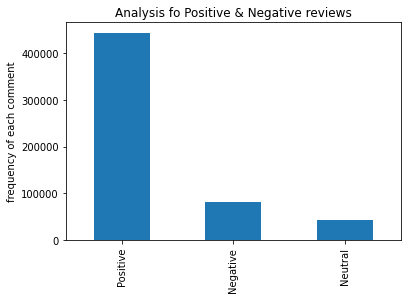

In [9]:
# Bar plot for positive and negative Reviews
df['Sentiment'].value_counts().plot(kind ="bar")
plt.title("Analysis fo Positive & Negative reviews")
plt.ylabel("frequency of each comment") 
plt.show()

In [10]:
# Lenth of each review
length = df.Reviews.apply(len)
length

0         263
1         190
2         509
3         219
4         140
         ... 
568449    149
568450    252
568451    372
568452    200
568453    111
Name: Reviews, Length: 568454, dtype: int64

In [11]:
# Adding length column to the Dataset
df = pd.concat([df , length] , axis = 1)
df.head()

,Ratings,Reviews,Sentiment,Reviews
0,5,I have bought several of the Vitality canned d...,Positive,263
1,1,Product arrived labeled as Jumbo Salted Peanut...,Negative,190
2,4,This is a confection that has been around a fe...,Positive,509
3,2,If you are looking for the secret ingredient i...,Negative,219
4,5,Great taffy at a great price. There was a wid...,Positive,140


In [12]:
df.columns.values[3] = "Length"
df.head()

,Ratings,Reviews,Sentiment,Length
0,5,I have bought several of the Vitality canned d...,Positive,263
1,1,Product arrived labeled as Jumbo Salted Peanut...,Negative,190
2,4,This is a confection that has been around a fe...,Positive,509
3,2,If you are looking for the secret ingredient i...,Negative,219
4,5,Great taffy at a great price. There was a wid...,Positive,140


In [13]:
# Visualization
!pip install wordcloud

In [14]:
from nltk.corpus import stopwords
# Stopwords -- The words which do not contain any particular meaning in the Dataset

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
# List of Stop words in English
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
# List of Punctuation marks
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
from wordcloud import WordCloud, STOPWORDS

In [19]:
# Creating a Function in order to get list of clean Textwords

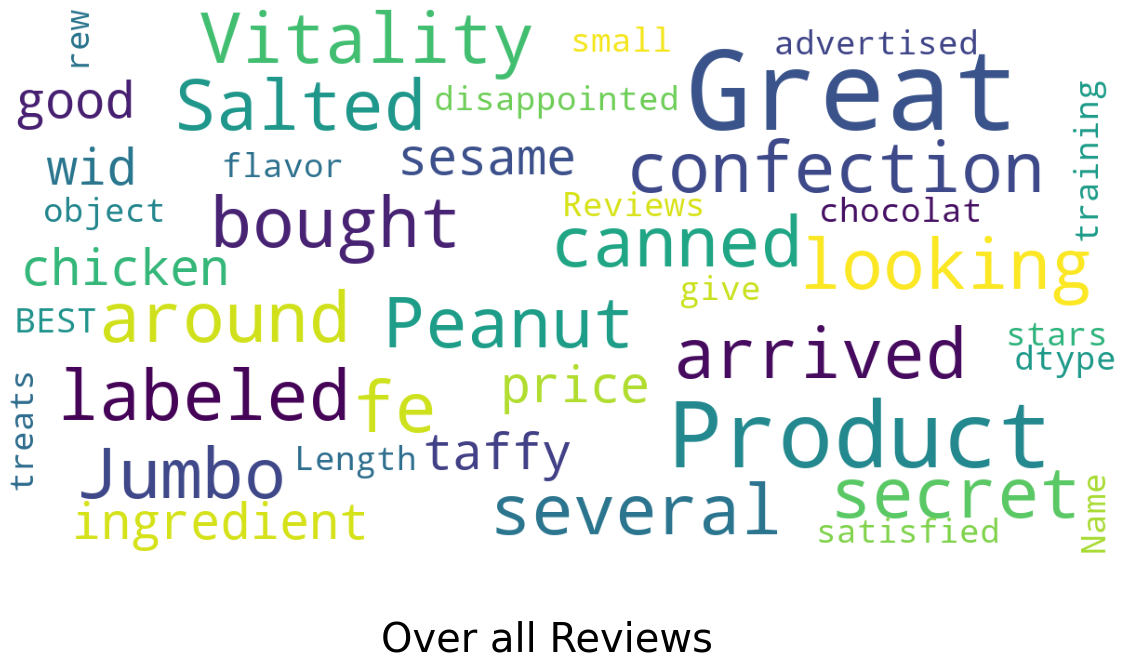

In [20]:
# Wordcloud for Overall Reviews
stopwords = set(STOPWORDS)
def Mywordcloud(data, title = None):
  wordcloud = WordCloud(
      background_color = 'white',
      stopwords = stopwords,
      max_words = 500,
      max_font_size = 40,
      scale = 3,
      random_state = 1
  ).generate(str(data))

  fig = plt.figure(1, figsize = (20,20))
  plt.axis('off')
  if title:
    fig.suptitle(title, fontsize=40)
    fig.subplots_adjust(top=2.3)

  plt.imshow(wordcloud)
  plt.show()


Mywordcloud(df['Reviews'].dropna(), 'Over all Reviews')

In [22]:
df_positive = df[df.Sentiment == 'Positive']
df_positive.head()

,Ratings,Reviews,Sentiment,Length
0,5,I have bought several of the Vitality canned d...,Positive,263
2,4,This is a confection that has been around a fe...,Positive,509
4,5,Great taffy at a great price. There was a wid...,Positive,140
5,4,I got a wild hair for taffy and ordered this f...,Positive,416
6,5,This saltwater taffy had great flavors and was...,Positive,304


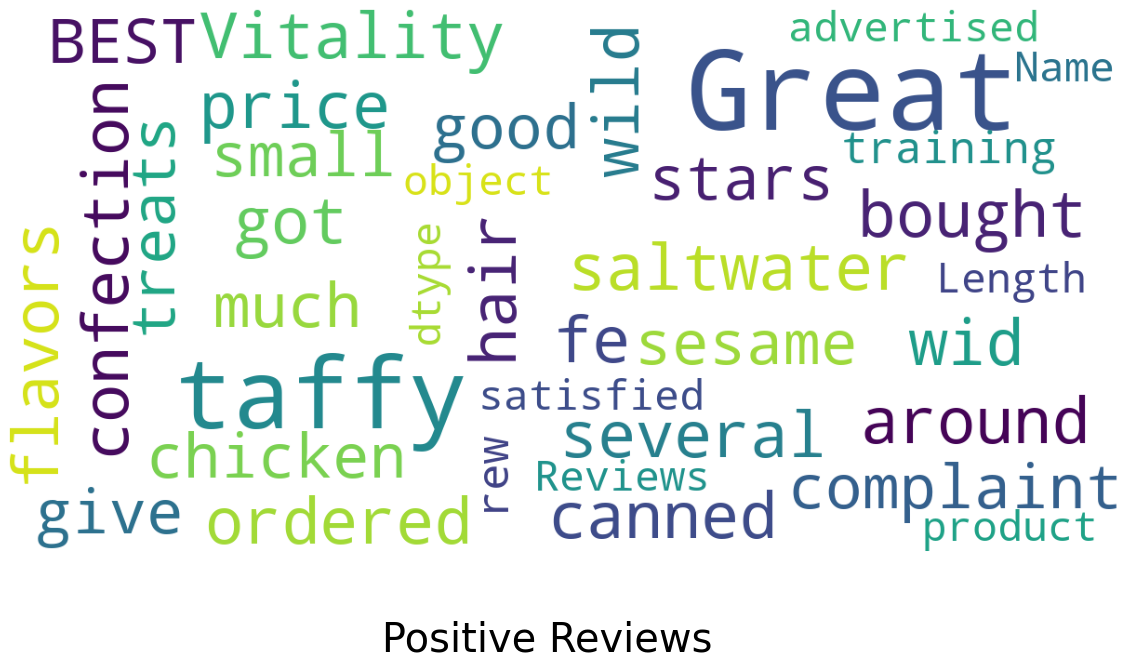

In [23]:
# Wordcloud for Positive Reviews
Mywordcloud(df_positive['Reviews'].dropna(), 'Positive Reviews')

In [25]:
df_neutral = df[df.Sentiment == 'Neutral']
df_neutral.head()

,Ratings,Reviews,Sentiment,Length
45,3,This seems a little more wholesome than some o...,Neutral,213
47,3,"The flavors are good. However, I do not see a...",Neutral,114
49,3,This is the same stuff you can buy at the big ...,Neutral,188
53,3,we're used to spicy foods down here in south t...,Neutral,158
60,3,Watch your prices with this. While the assort...,Neutral,152


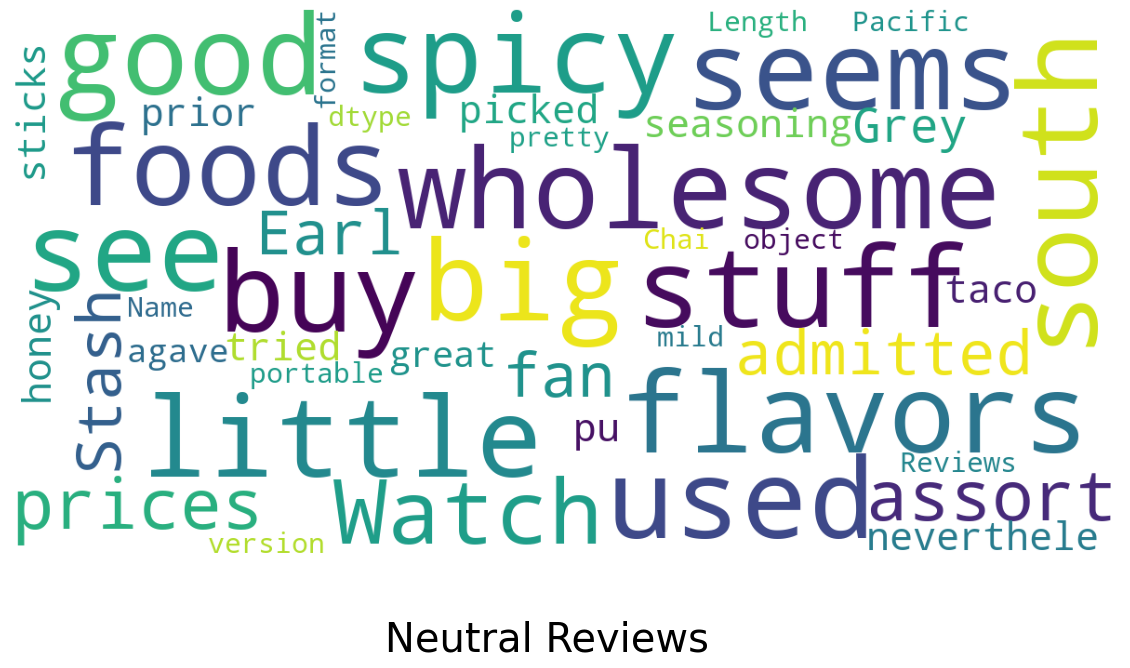

In [26]:
# Wordcloud for Neutral Reviews
Mywordcloud(df_neutral['Reviews'].dropna(), 'Neutral Reviews')

In [27]:
df_negative = df[df.Sentiment == 'Negative']
df_negative.head()

,Ratings,Reviews,Sentiment,Length
1,1,Product arrived labeled as Jumbo Salted Peanut...,Negative,190
3,2,If you are looking for the secret ingredient i...,Negative,219
12,1,My cats have been happily eating Felidae Plati...,Negative,399
16,2,I love eating them and they are good for watch...,Negative,195
26,1,"The candy is just red , No flavor . Just plan...",Negative,88


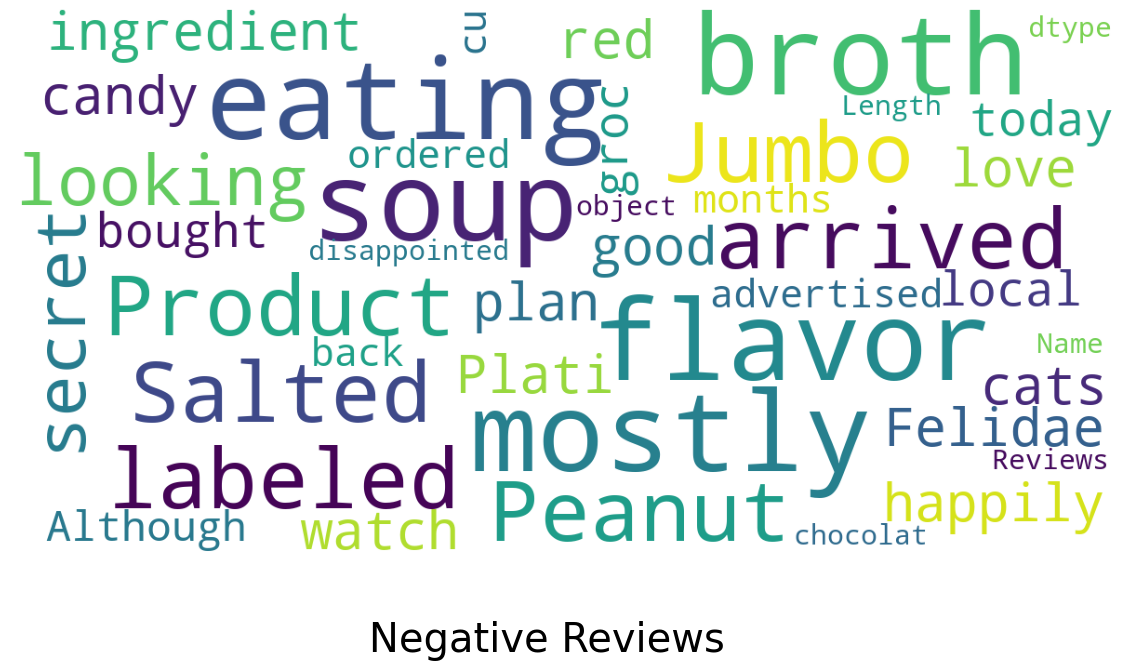

In [28]:
# Wordcloud for Negative Reviews
Mywordcloud(df_negative['Reviews'].dropna(), 'Negative Reviews')

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer =  CountVectorizer(analyzer = 'word').fit(df["Reviews"])

In [30]:
# How many times a particular word is repeated...
bow_transformer.vocabulary_

{'have': 55826,
 'bought': 23609,
 'several': 97132,
 'of': 78138,
 'the': 107849,
 'vitality': 115220,
 'canned': 26441,
 'dog': 40480,
 'food': 48990,
 'products': 86858,
 'and': 8702,
 'found': 49440,
 'them': 107923,
 'all': 7659,
 'to': 109062,
 'be': 20503,
 'good': 52974,
 'quality': 88452,
 'product': 86838,
 'looks': 67849,
 'more': 73778,
 'like': 66909,
 'stew': 103013,
 'than': 107778,
 'processed': 86746,
 'meat': 70919,
 'it': 61953,
 'smells': 99686,
 'better': 21549,
 'my': 74890,
 'labrador': 65312,
 'is': 61806,
 'finicky': 47808,
 'she': 97464,
 'appreciates': 9696,
 'this': 108240,
 'most': 73956,
 'arrived': 10276,
 'labeled': 65270,
 'as': 10435,
 'jumbo': 63221,
 'salted': 94596,
 'peanuts': 81975,
 'were': 116714,
 'actually': 6057,
 'small': 99597,
 'sized': 98939,
 'unsalted': 113075,
 'not': 76912,
 'sure': 105148,
 'if': 59031,
 'was': 116083,
 'an': 8583,
 'error': 44454,
 'or': 79113,
 'vendor': 114451,
 'intended': 61097,
 'represent': 91731,
 'confection

In [31]:
# Unique Words Count...
print(len(bow_transformer.vocabulary_))

120252


In [33]:
# I/P and O/P
x=df.iloc[:,1].values
y=df.iloc[:,2].values

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 0)

In [35]:

x_train.shape

(397917,)

In [36]:
x_test.shape


(170537,)

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
text_model = Pipeline([('tfidf',TfidfVectorizer()),('model',MultinomialNB())])
text_model.fit(x_train, y_train)
y_pred = text_model.predict(x_test)
y_pred

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype='<U8')

In [38]:
y_test

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [40]:
accuracy_score(y_pred,y_test)*100


79.60911708309634

In [41]:
confusion_matrix(y_pred,y_test)

array([[  2811,    122,    123],
       [     1,      6,     30],
       [ 21939,  12559, 132946]])

In [42]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    Negative       0.11      0.92      0.20      3056
     Neutral       0.00      0.16      0.00        37
    Positive       1.00      0.79      0.88    167444

    accuracy                           0.80    170537
   macro avg       0.37      0.63      0.36    170537
weighted avg       0.98      0.80      0.87    170537



In [51]:
text_model.predict(['Good food'])

array(['Positive'], dtype='<U8')

In [52]:
text_model.predict(['Worst food'])

array(['Negative'], dtype='<U8')